In [84]:
from astroquery import sha
from astropy import coordinates as coord
from astropy import units as u
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube
from astropy.visualization import quantity_support
from astropy.wcs import WCS
import numpy as np
from astropy.visualization import simple_norm
from astropy.nddata import Cutout2D
from reproject import reproject_interp


In [226]:
loc = '/orange/adamginsburg/cmz/g5/G5/sum/spw17_12CO/g5.mom0.smK.tot.12CO.spw17.im/'
# g5.12CO.spw17.im/
mom0_12CO = SpectralCube.read(loc, format='casa')#.with_spectral_unit(u.km / u.s, velocity_convention='radio')
#mom0_12CO[0]
cube = mom0_12CO
g5_data = mom0_12CO[0]
type(mom0_12CO)

spectral_cube.dask_spectral_cube.DaskSpectralCube

In [47]:
size = np.abs(np.max(cube.shape[1:] * cube.wcs.pixel_scale_matrix.diagonal()[:2])*u.deg)*1.5
center = coordinates.SkyCoord(*cube[0].world[int(cube.shape[1]/2), int(cube.shape[2]/2)][::-1],
                              frame=wcs.utils.wcs_to_celestial_frame(cube.wcs))
spitzer_data = get_spitzer_data(center, size)

AttributeError: 'SkyCoord' object has no attribute 'ra'

In [87]:
g5_center = coord.SkyCoord(5.4*u.deg, -0.4*u.deg, frame='galactic')
# 270.1260000 # -24.0667000
# 168.8458 # -61.2500
g5_center.transform_to('fk5')

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (269.86938156, -24.49184938)>

In [88]:
#pos_t1 = sha.query(coord=coord.SkyCoord(ra=163.6136, dec=-11.784,
#unit=(u.degree, u.degree)), size=0.5)

spitz = sha.query(coord=g5_center, size=0.5)
#pos_t2 = sha.query(ra=163.6136, dec=-11.784, size=0.5)
spitz

reqkey,modedisplayname,wavelength,cra,cdec,filetype,externalname,ptcomment,ra,dec,epoch,equinox,begintime,endtime,minwavelength,maxwavelength,pbcdid,filesize,campid,ra1,dec1,ra2,dec2,ra3,dec3,ra4,dec4,naxis1,naxis2,cdelt1,cdelt2,crota2,crpix1,crpix2,crval1,crval2,ctype1,ctype2,heritagefilename,hasAccess,accessUrl,accessWithAnc1Url
int64,bytes16,bytes20,bytes13,bytes13,bytes9,bytes66,bytes56,float64,float64,float64,float64,bytes20,bytes20,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,bytes9,bytes9,bytes95,bytes31,bytes108,bytes121
14345216,IRAC Map,IRAC 8.0um,17h58m49.96s,-24d14m22.6s,Image,r14345216/ch4/pbcd/SPITZER_I4_14345216_0000_5_E8705412_maic.fits,Mosaic image (long frametime if data taken in HDR mode),269.7082,-24.2396,2005.725,2000.0,2005-09-21 14:40:58,2005-09-21 15:19:34,6.43,9.28,8705412,138473280,802,268.4463,-24.4504,268.4476,-24.0325,270.9658,-24.0185,270.9727,-24.4363,2508,13802,-0.0002,0.0002,-89.6499,1254.5,6901.5,269.7082,-24.2396,RA---TAN,DEC--TAN,/sha/archive/proc/IRAC007000/r14345216/ch4/pbcd/SPITZER_I4_14345216_0000_5_E8705412_maic.fits,true,https://sha.ipac.caltech.edu/applications/Spitzer/SHA/servlet/ProductDownload?DATASET=level2&ID=8705412,https://sha.ipac.caltech.edu/applications/Spitzer/SHA/servlet/ProductDownload?DATASET=level2&ID=8705412&OPTIONS=anc1
22491136,IRS Stare,IRS LL 14.0-38.0um,17h59m37.92s,-24d20m36.6s,Image,r22491136/ch2/pbcd/SPITZER_S2_22491136_0007_3_E7720565_coa2d.fits,Coadded 2D data,269.908,-24.3435,2008.3063,2000.0,2008-04-21 02:27:03,2008-04-21 02:31:35,14.0,38.0,7720565,89280,1422,269.8531,-24.3447,269.8531,-24.3417,269.9629,-24.3423,269.9629,-24.3453,2,2,-0.0015,0.05,-90.3539,1.5,1.5,269.908,-24.3435,RA---TAN,DEC--TAN,/sha/archive/proc/IRSX010300/r22491136/ch2/pbcd/SPITZER_S2_22491136_0007_3_E7720565_coa2d.fits,true,https://sha.ipac.caltech.edu/applications/Spitzer/SHA/servlet/ProductDownload?DATASET=level2&ID=7720565,https://sha.ipac.caltech.edu/applications/Spitzer/SHA/servlet/ProductDownload?DATASET=level2&ID=7720565&OPTIONS=anc1
14344704,IRAC Map,IRAC 3.6um,18h0m0.46s,-24d43m20.6s,Image,r14344704/ch1/pbcd/SPITZER_I1_14344704_0000_5_E8704390_maic.fits,Mosaic image (long frametime if data taken in HDR mode),270.0019,-24.7224,2005.7249,2000.0,2005-09-21 13:50:48,2005-09-21 14:10:03,3.17,3.95,8704390,72334080,802,269.3416,-24.936,269.3391,-24.5182,270.66,-24.5059,270.6669,-24.9237,2507,7212,-0.0002,0.0002,-89.4147,1254.0,3606.5,270.0019,-24.7224,RA---TAN,DEC--TAN,/sha/archive/proc/IRAC007000/r14344704/ch1/pbcd/SPITZER_I1_14344704_0000_5_E8704390_maic.fits,true,https://sha.ipac.caltech.edu/applications/Spitzer/SHA/servlet/ProductDownload?DATASET=level2&ID=8704390,https://sha.ipac.caltech.edu/applications/Spitzer/SHA/servlet/ProductDownload?DATASET=level2&ID=8704390&OPTIONS=anc1
14315776,IRAC Map,IRAC 3.6um,17h58m39.11s,-23d59m54.3s,Image,r14315776/ch1/pbcd/SPITZER_I1_14315776_0000_3_E8590727_maic.fits,Mosaic image (long frametime if data taken in HDR mode),269.663,-23.9984,2006.3254,2000.0,2006-04-28 18:06:30,2006-04-28 18:33:13,3.17,3.95,8590727,160493760,832,271.1176,-23.7725,271.1258,-24.1904,268.2033,-24.2105,268.2046,-23.7927,2508,15997,-0.0002,0.0002,90.4333,1254.5,7999.0,269.663,-23.9984,RA---TAN,DEC--TAN,/sha/archive/proc/IRAC008000/r14315776/ch1/pbcd/SPITZER_I1_14315776_0000_3_E8590727_maic.fits,true,https://sha.ipac.caltech.edu/applications/Spitzer/SHA/servlet/ProductDownload?DATASET=level2&ID=8590727,https://sha.ipac.caltech.edu/applications/Spitzer/SHA/servlet/ProductDownload?DATASET=level2&ID=8590727&OPTIONS=anc1
51094528,IRAC Map PC,IRAC 3.6um,17h57m11.23s,-24d57m50.9s,Image,r51094528/ch1/pbcd/SPITZER_I1_51094528_0000_2_E10723498_maic.fits,Mosaic image (long frametime if data taken in HDR mode),269.2968,-24.9641,2014.4856,2000.0,2014-06-26 05:52:16,2014-06-26 06:44:42,3.17,3.95,10723498,25326720,2331,269.4674,-24.6789,269.4654,-25.2505,269.1254,-

In [141]:
# 5, 6
url = spitz['accessUrl'][5].strip()
hdu_list = sha.get_file(url)
hdu_list.info()

Filename: <class '_io.BytesIO'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     143   (263, 275)   float32   


In [142]:
image_data = hdu_list[0].data
header = hdu_list[0].header
#type(hdu_list[0])

In [143]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(275, 263)


In [144]:
# image_data
# g5_data

spitz_hdu = hdu_list[0]
g5_hdu = mom0_12CO[0].hdu

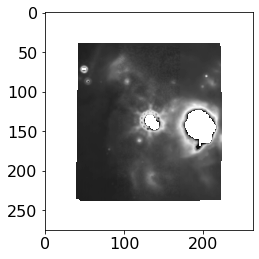

In [145]:
plt.imshow(image_data, cmap='gray')

In [146]:
array, footprint = reproject_interp(g5_hdu, spitz_hdu.header)

Text(0.5, 1.0, 'G5')

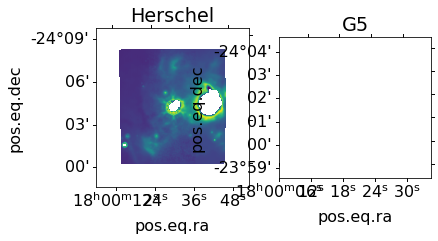

In [157]:
ax1 = plt.subplot(1,2,1,projection=WCS(spitz_hdu.header))
ax1.imshow(spitz_hdu.data)
#ax1.coords['glon'].set_axislabel('Galactic Longitude')
#ax1.coords['glat'].set_axislabel('Galactic Latitude')
ax1.set_title('Herschel')

ax2 = plt.subplot(1,2,2, projection=WCS(spitz_hdu.header))
ax2.imshow(array)
#ax2.coords['glon'].set_axislabel('Galactic Longitude')
#ax2.coords['glat'].set_axislabel('Galactic Latitude')
#ax2.coords['glat'].set_axislabel_position('r')
#ax2.coords['glat'].set_ticklabel_position('r')
ax2.set_title('G5')

In [ ]:
plt.figure(figsize=(8,8))

wcs = WCS(head)
ax = plt.subplot(projection=wcs)
#plt.imshow(mom0_12CO[0].value)#, vmin=-2.e-5, vmax=2.e-4, origin='lower')

norm = simple_norm(image_data, 'asinh')
plt.imshow(image_data, norm=norm)#, vmin=-2.e-5, vmax=2.e-4, origin='lower')

plt.contour(mom0_12CO[0].value, levels=np.logspace(0, 5, num=25), colors='black', alpha=0.5)

In [138]:
'''ax1 = plt.subplot(1,2,1, projection=WCS(hdu1.header))
ax1.imshow(hdu1.data, origin='lower', vmin=-100., vmax=2000.)
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')
ax1.set_title('2MASS K-band')

ax2 = plt.subplot(1,2,2, projection=WCS(hdu2.header))
ax2.imshow(hdu2.data, origin='lower', vmin=-2.e-4, vmax=5.e-4)
ax2.coords['glon'].set_axislabel('Galactic Longitude')
ax2.coords['glat'].set_axislabel('Galactic Latitude')
ax2.coords['glat'].set_axislabel_position('r')
ax2.coords['glat'].set_ticklabel_position('r')
ax2.set_title('MSX band E')'''



"ax1 = plt.subplot(1,2,1, projection=WCS(hdu1.header))\nax1.imshow(hdu1.data, origin='lower', vmin=-100., vmax=2000.)\nax1.coords['ra'].set_axislabel('Right Ascension')\nax1.coords['dec'].set_axislabel('Declination')\nax1.set_title('2MASS K-band')\n\nax2 = plt.subplot(1,2,2, projection=WCS(hdu2.header))\nax2.imshow(hdu2.data, origin='lower', vmin=-2.e-4, vmax=5.e-4)\nax2.coords['glon'].set_axislabel('Galactic Longitude')\nax2.coords['glat'].set_axislabel('Galactic Latitude')\nax2.coords['glat'].set_axislabel_position('r')\nax2.coords['glat'].set_ticklabel_position('r')\nax2.set_title('MSX band E')"

In [139]:
hdu_list.close()

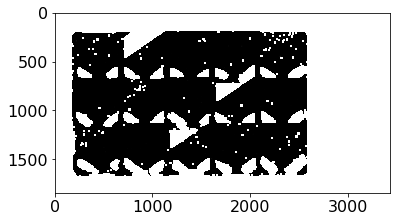

In [140]:
plt.imshow(image_data, cmap='gray')

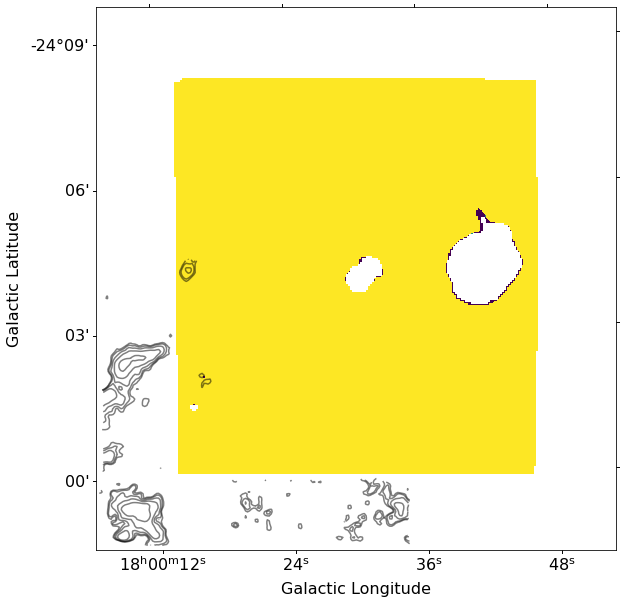

In [78]:
plt.figure(figsize=(10,10))

wcs = WCS(header)

plt.subplot(projection=wcs)
plt.imshow(image_data, vmin=-2.e-5, vmax=2.e-4, origin='lower')
#plt.grid(color='white', ls='solid')
plt.contour(mom0_12CO[0].value, levels=np.logspace(0, 5, 20), colors='black', alpha=0.5)
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')

In [79]:
'''plt.figure(figsize=(20,20))

wcs = WCS(header)

plt.subplot(projection=wcs)
plt.imshow(image_data, vmin=-2.e-5, vmax=2.e-4, origin='lower')
#plt.grid(color='white', ls='solid')
plt.contour(mom0_12CO[0].value, levels=np.logspace(0, 5, 20), colors='black', alpha=0.5)'''

"plt.figure(figsize=(20,20))\n\nwcs = WCS(header)\n\nplt.subplot(projection=wcs)\nplt.imshow(image_data, vmin=-2.e-5, vmax=2.e-4, origin='lower')\n#plt.grid(color='white', ls='solid')\nplt.contour(mom0_12CO[0].value, levels=np.logspace(0, 5, 20), colors='black', alpha=0.5)"

"\noverlay = ax.get_coords_overlay('fk5')\nax.coords['glon'].set_ticks(color='red')\nax.coords['glat'].set_ticks(color='red')\n\nax.coords['glon'].set_axislabel('Galactic Longitude')\nax.coords['glat'].set_axislabel('Galactic Latitude')\n\nax.coords.grid(color='red', linestyle='solid', alpha=0.5)\n\noverlay['ra'].set_ticks(color='green')\noverlay['dec'].set_ticks(color='green')\n\noverlay['ra'].set_axislabel('Right Ascension')\noverlay['dec'].set_axislabel('Declination')\n\noverlay.grid(color='green', linestyle='solid', alpha=0.5)"

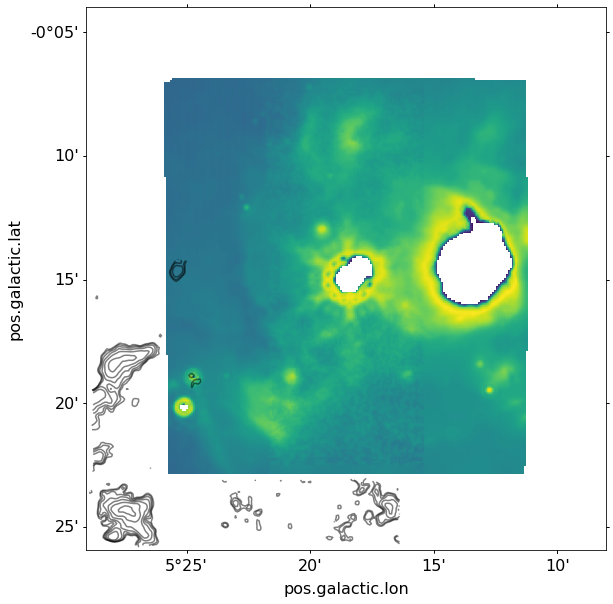

In [83]:
plt.figure(figsize=(10,10))

head = mom0_12CO[0].header
wcs = WCS(head)
ax = plt.subplot(projection=wcs)
#plt.imshow(mom0_12CO[0].value)#, vmin=-2.e-5, vmax=2.e-4, origin='lower')

norm = simple_norm(image_data, 'asinh')
plt.imshow(image_data, norm=norm)#, vmin=-2.e-5, vmax=2.e-4, origin='lower')

plt.contour(mom0_12CO[0].value, levels=np.logspace(0, 5, num=25), colors='black', alpha=0.5)
#norm2 = simple_norm(mom0_12CO[0].value, 'asinh')
#plt.imshow(mom0_12CO[0].value, norm=norm2)

#ax = plt.subplot(projection=wcs, label='overlays')

#ax.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, origin='lower')

'''
overlay = ax.get_coords_overlay('fk5')
ax.coords['glon'].set_ticks(color='red')
ax.coords['glat'].set_ticks(color='red')

ax.coords['glon'].set_axislabel('Galactic Longitude')
ax.coords['glat'].set_axislabel('Galactic Latitude')

ax.coords.grid(color='red', linestyle='solid', alpha=0.5)

overlay['ra'].set_ticks(color='green')
overlay['dec'].set_ticks(color='green')

overlay['ra'].set_axislabel('Right Ascension')
overlay['dec'].set_axislabel('Declination')

overlay.grid(color='green', linestyle='solid', alpha=0.5)'''

In [160]:
np.nanmin(image_data)

-31.511507

In [161]:
np.nanmax(image_data)

517433.1

In [148]:
np.nanmean(image_data)

13.18791

In [ ]:
position = g5_center#(49.7, 100.1)
size = (41, 51)     # pixels
cutout = Cutout2D(data, position, size)

In [ ]:
import requests
import re
import numpy as np
from astropy import table
import io
import time
from astropy import units as u
import radio_beam
import regions
from astropy.io import fits
from astropy.visualization import simple_norm
from astropy import stats, convolution, wcs, coordinates
from spectral_cube import SpectralCube
import pylab as pl
import spectral_cube
from spectral_cube import Projection,SpectralCube
import reproject

from spectralindex import prefixes

import warnings
warnings.filterwarnings('ignore', category=spectral_cube.utils.StokesWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=pl.matplotlib.cbook.MatplotlibDeprecationWarning)
np.seterr('ignore')

In [152]:
def get_spitzer_data(crd, size):
    files = {}
    for spitzertbl in glimpses:
        if 'glimpse' in spitzertbl:
            url = f"https://irsa.ipac.caltech.edu/IBE?table=spitzer.{spitzertbl}&POS={crd.ra.deg},{crd.dec.deg}&ct=csv&mcen&where=fname+like+'%.fits'"
        else:
            url = f"https://irsa.ipac.caltech.edu/IBE?table=spitzer.{spitzertbl}&POS={crd.ra.deg},{crd.dec.deg}&ct=csv&where=fname+like+'%.fits'"
        response = requests.get(url)
        response.raise_for_status()
        tbl = table.Table.read(io.BytesIO(response.content), format='ascii.csv')

        if (len(tbl) >= 4) and 'I1' not in files:
            fnames = tbl['fname']

            for fname in fnames:
                irsa_url = f"https://irsa.ipac.caltech.edu/ibe/data/spitzer/{spitzertbl}/{fname}?center={crd.ra.deg},{crd.dec.deg}&size={size.to(u.arcmin).value}arcmin"

                key = re.search("I[1-4]", fname).group()

                fh = fits.open(irsa_url)
                files[key] = fh
        elif 'mipsgal' in spitzertbl:
            fnames = tbl['fname']
            for fname in fnames:
                irsa_url = f"https://irsa.ipac.caltech.edu/ibe/data/spitzer/{spitzertbl}/{fname}?center={crd.ra.deg},{crd.dec.deg}&size={size.to(u.arcmin).value}arcmin"
                if 'mosaics24' in irsa_url and 'covg' not in irsa_url and 'mask' not in irsa_url and 'std' not in irsa_url:
                    fh = fits.open(irsa_url)
                    files['MG'] = fh
    return files


In [227]:
mom0_12CO = SpectralCube.read(loc, format='casa')#.with_spectral_unit(u.km / u.s, velocity_convention='radio')
cube = mom0_12CO

In [213]:

#g5_data = mom0_12CO[0]
#g5_hdu = g5_data.hdu

size = np.abs(np.max(cube.shape[1:] * cube.wcs.pixel_scale_matrix.diagonal()[:2])*u.deg)*1.5
center = coordinates.SkyCoord(*cube[0].world[int(cube.shape[1]/2), int(cube.shape[2]/2)][::-1],
                              frame=wcs.utils.wcs_to_celestial_frame(cube.wcs))
center = center.transform_to('fk5')
spitzer_data = get_spitzer_data(center, size)

KeyboardInterrupt: 

In [164]:
assert 'I1' in spitzer_data
assert 'MG' in spitzer_data

In [167]:
spitzer_cube = np.array([spitzer_data['I4'][0].data, spitzer_data['I2'][0].data, spitzer_data['I1'][0].data, ])
#fits.PrimaryHDU(data=spitzer_cube, header=spitzer_data['I1'][0].header).writeto(spitzer_cubename, overwrite=True)

mipsdata,_ = reproject.reproject_interp(spitzer_data['MG'][0], spitzer_data['I1'][0].header)
mipsdata[np.isnan(mipsdata)] = np.nanmax(mipsdata)
mips_cube = np.array([mipsdata, spitzer_data['I4'][0].data, spitzer_data['I1'][0].data, ])
#fits.PrimaryHDU(data=mips_cube, header=spitzer_data['I1'][0].header).writeto(spitzer_cubename.replace("spitzer", "mips"), overwrite=True)


In [175]:
spitzer_data

{'I2': [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x2b28f6f9d4f0>],
 'I3': [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x2b28f6fbccd0>],
 'I1': [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x2b28f6fcb8e0>],
 'I4': [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x2b28f6fcba00>],
 'MG': [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x2b28f6fde1c0>]}

In [275]:
def plot_spitz(spitz, image, contour_levels):
    spitz = spitz[0]
    ww = wcs.WCS(spitz.header)
    fig = pl.figure(1, figsize=(8,8))
    #fig.ckf()
    ax = fig.add_subplot(projection=ww.celestial)
    spitzer_display_args=dict(stretch='log', min_percent=1, max_percent=99.99, clip=True)
    spitz_data = np.array([simple_norm(x, **spitzer_display_args)(x) for x in spitz.data])
    ax.imshow(spitz_data.T.swapaxes(0,1))
    lims = ax.axis()
    ax.contour(image, transform=ax.get_transform(image.wcs.celestial), levels=contour_levels, colors='white', linewidths=[1.5])
    ax.coords['glon'].set_axislabel('Galactic Longitude')
    ax.coords['glat'].set_axislabel('Galactic Latitude')

#for im in spitzer_data.items():
#    plot_spitz(im)
    #spitz = fits.open(im[1])[0]


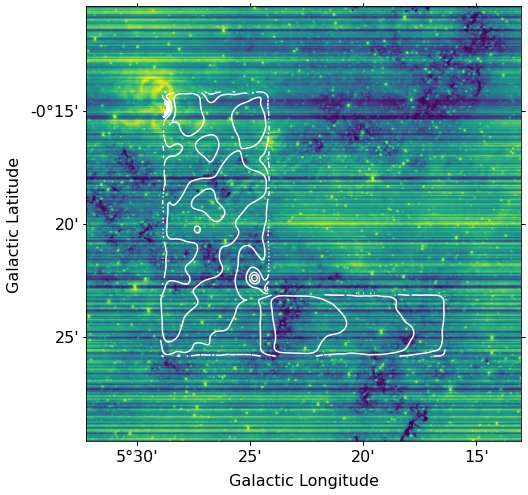

In [279]:
loc1 = '/orange/adamginsburg/cmz/g5/G5/sum/spw17_12CO/g5.mom0.smK.tot.12CO.spw17.im/'
# g5.12CO.spw17.im/ # g5.mom0.smK.tot.12CO.spw17.im/
cube = SpectralCube.read(loc1, format='casa_image')
#pbv,_ = reproject.reproject_interp(pb[10].hdu, fh[0].header)

                # 10th channel is arbitrary but avoids edge channel
#data = fh[0].data * pbv
data = cube[0].hdu.data


m0 = Projection(data, wcs=wcs.WCS(cube[0].hdu.header))


std = stats.mad_std(data, ignore_nan=True)
levels = np.array([3, 5, 10, 20, 30])*std

m0 = Projection(data, wcs=wcs.WCS(cube[0].hdu.header))
contour_levels = np.logspace(0, 5, num=25)
    
plot_spitz(spitzer_data['I4'], m0, contour_levels)

#cube[0].hdu.data

In [252]:
spitzer_data

{'I2': [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x2b28f6f9d4f0>],
 'I3': [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x2b28f6fbccd0>],
 'I1': [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x2b28f6fcb8e0>],
 'I4': [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x2b28f6fcba00>],
 'MG': [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x2b28f6fde1c0>]}

In [274]:
spitzer_data['I2'][0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1921 / length of data axis 1                          
NAXIS2  =                 1921 / length of data axis 2                          
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
TELESCOP= 'SPITZER '           / Telescope                                      
INSTRUME= 'IRAC    '           / Instrument ID                                  
ORIGIN  = 'UW Astronomy Dept'  / Installation where FITS file written           
CREATOR = 'GLIMPSE Pipeline'   / SW that created this FITS file                 
CREATOR1= 'S14.0.0 '           / SSC pipeline that created the BCD              
PIPEVERS= '1v04    '        

In [166]:
def show_fov_on_spitzer(finaliter_prefix_b3, finaliter_prefix_b6, fieldid, spitzerpath='spitzer_datapath',
                        spitzer_display_args=dict(stretch='log', min_percent=1, max_percent=99.99, clip=True),
                        mips=False,
                        figsize=(10,10),
                        zoom=None,
                        contour_level={'B3':[0.01], 'B6':[0.01]}):
    image_b3 = SpectralCube.read(f'{finaliter_prefix_b3}.image.tt0.fits', use_dask=False, format='fits')
    image_b6 = SpectralCube.read(f'{finaliter_prefix_b6}.image.tt0.fits', use_dask=False, format='fits')

    spitzfn = f'{spitzerpath}/{fieldid}_spitzer_images.fits'
    if mips:
        spitzfn = spitzfn.replace("spitzer", "mips")
    spitz = fits.open(spitzfn)[0]

    ww = wcs.WCS(spitz.header)

    fig = pl.figure(1, figsize=figsize)
    fig.clf()
    ax = fig.add_subplot(projection=ww.celestial)

    spitz_data = np.array([simple_norm(x, **spitzer_display_args)(x) for x in spitz.data])

    ax.imshow(spitz_data.T.swapaxes(0,1))

    lims = ax.axis()


    if zoom:
        xdiff = lims[1] - lims[0]
        ydiff = lims[3] - lims[2]
        lims = (lims[0] + xdiff/zoom/2,
                lims[1] - xdiff/zoom/2,
                lims[2] + ydiff/zoom/2,
                lims[3] - ydiff/zoom/2)
    else:
        zoom = 1

    ax.contour(image_b3.mask.include()[0], transform=ax.get_transform(image_b3.wcs.celestial), levels=[0.5], colors=['orange'])
    ax.contour(image_b6.mask.include()[0], transform=ax.get_transform(image_b6.wcs.celestial), levels=[0.5], colors=['cyan'])
    ax.contour(image_b3[0].value,  transform=ax.get_transform(image_b3.wcs.celestial), levels=contour_level['B3'], colors=['wheat'], linewidths=[0.5])
    ax.contour(image_b6[0].value,  transform=ax.get_transform(image_b6.wcs.celestial), levels=contour_level['B6'], colors=['lightblue'], linewidths=[0.5])


    ax.axis(lims)
    ax.set_xlabel('Galactic Longitude')
    ax.set_ylabel('Galactic Latitude')

    txtpos = [0.97, 0.97]
    # xx,yy = ax.transData.inverted().transform(ax.transAxes.transform(txtpos))
    # arr = ax.images[0].get_array()
    # bgcolor = arr[int(xx)-2:int(xx)+2, int(yy)-2:int(yy)+2, :].mean(axis=(0,1))

    # #from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

    # #def complementary(r, g, b):
    # #    """returns RGB components of complementary color"""
    # #    hsv = rgb_to_hsv((r, g, b))
    # #    # force saturation to 1
    # #    return hsv_to_rgb(((hsv[0] + 0.5) % 1, 1, 1))

    # if np.any(bgcolor.mask) or bgcolor.mean() < 0.5:
    #     txcolor = 'white'
    # else:
    #     txcolor = 'black' #complementary(*bgcolor)
    txcolor = 'white'

    txt = ax.text(*txtpos, fieldid, horizontalalignment='right',
                  #fontweight='bold',
                  color=txcolor,
                  fontsize=22,
                  verticalalignment='top', transform=ax.transAxes)

    #pl.figure(2).gca().imshow(image_b6.mask.include()[0])
    return fig

In [154]:
def show_contours_on_spitzer(fieldid, image, spitzerpath='spitzer_datapath',
                             spitzer_display_args=dict(stretch='log', min_percent=1, max_percent=99.99, clip=True),
                             mips=False,
                             figsize=(10,10),
                             color='orange',
                             zoom=None,
                             line=None,
                             contour_levels=None):
    """
    image should be Projection-like: should have .wcs.celestial
    """


    spitzfn = f'{spitzerpath}/{fieldid}_spitzer_images.fits'
    if mips:
        spitzfn = spitzfn.replace("spitzer", "mips")
    spitz = fits.open(spitzfn)[0]

    ww = wcs.WCS(spitz.header)

    fig = pl.figure(1, figsize=figsize)
    fig.clf()
    ax = fig.add_subplot(projection=ww.celestial)

    spitz_data = np.array([simple_norm(x, **spitzer_display_args)(x) for x in spitz.data])

    ax.imshow(spitz_data.T.swapaxes(0,1))

    lims = ax.axis()


    if zoom:
        xdiff = lims[1] - lims[0]
        ydiff = lims[3] - lims[2]
        lims = (lims[0] + xdiff/zoom/2,
                lims[1] - xdiff/zoom/2,
                lims[2] + ydiff/zoom/2,
                lims[3] - ydiff/zoom/2)
    else:
        zoom = 1

    ax.contour(image, transform=ax.get_transform(image.wcs.celestial), levels=contour_levels, colors=[color], linewidths=[0.5])

    ax.axis(lims)
    ax.set_xlabel('Galactic Longitude')
    ax.set_ylabel('Galactic Latitude')

    txtpos = [0.97, 0.97]
    # xx,yy = ax.transData.inverted().transform(ax.transAxes.transform(txtpos))
    # arr = ax.images[0].get_array()
    # bgcolor = arr[int(xx)-2:int(xx)+2, int(yy)-2:int(yy)+2, :].mean(axis=(0,1))

    # #from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

    # #def complementary(r, g, b):
    # #    """returns RGB components of complementary color"""
    # #    hsv = rgb_to_hsv((r, g, b))
    # #    # force saturation to 1
    # #    return hsv_to_rgb(((hsv[0] + 0.5) % 1, 1, 1))

    # if np.any(bgcolor.mask) or bgcolor.mean() < 0.5:
    #     txcolor = 'white'
    # else:
    #     txcolor = 'black' #complementary(*bgcolor)
    txcolor = 'white'

    text = fieldid
    if line:
        text = f'{text}\n{line}'

    txt = ax.text(*txtpos, text, horizontalalignment='right',
                  #fontweight='bold',
                  color=txcolor,
                  fontsize=22,
                  verticalalignment='top', transform=ax.transAxes)

    #pl.figure(2).gca().imshow(image_b6.mask.include()[0])
    return fig
